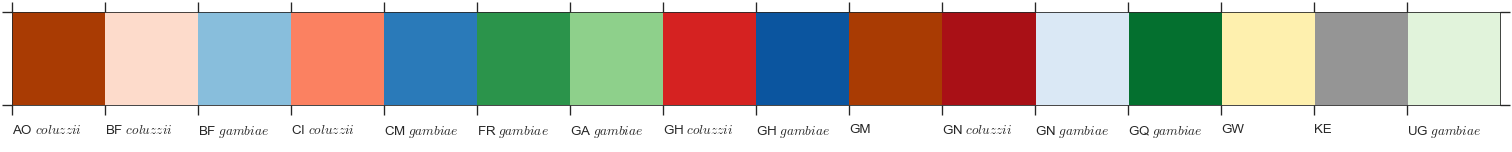

In [14]:
%run data_phase2_ar1.ipynb

# single GNA sample becomes part of GNS 

In [15]:
df_samples[df_samples.population == 'GNA']

,ox_code,population,solaris_sample_id,src_code,country,region,contributor,contact,year,m_s,...,contamination_freemix_autosomal_not2L,contamination_freemix_autosomal_not2L_dpflt,number_of_unique_libraries,number_of_lanes,earliest_sequencing_date,latest_sequencing_date,libraries,lane_file_solaris_ids,lane_file_names,SRA_sample_accession
1033,AV0007-C,GNA,30513,KB041,Guinea,Koraboh,Kenneth Vernick,"Michelle Riehle, Karin Eiglmeier",2012.0,M/S,...,0.00451,0.00447,1.0,3.0,2013-05-29,2013-06-10,DN282013B:B9,"39775,41612,41631","9951_1#66.bam,10037_3#66.bam,10037_2#66.bam",ERS224551


In [20]:
df_samples.set_value(1033, 'population', 'GNS')
df_samples[df_samples.index == 1033]

,ox_code,population,solaris_sample_id,src_code,country,region,contributor,contact,year,m_s,...,contamination_freemix_autosomal_not2L,contamination_freemix_autosomal_not2L_dpflt,number_of_unique_libraries,number_of_lanes,earliest_sequencing_date,latest_sequencing_date,libraries,lane_file_solaris_ids,lane_file_names,SRA_sample_accession
1033,AV0007-C,GNS,30513,KB041,Guinea,Koraboh,Kenneth Vernick,"Michelle Riehle, Karin Eiglmeier",2012.0,M/S,...,0.00451,0.00447,1.0,3.0,2013-05-29,2013-06-10,DN282013B:B9,"39775,41612,41631","9951_1#66.bam,10037_3#66.bam,10037_2#66.bam",ERS224551


# we now have 16 populations, change the population names to new two letter+species nomenclature

In [23]:
#make a dictionary of old names to new
oldnew = {
    'AOM': 'AOcol', 
    'BFM': 'BFcol', 
    'CIM': 'CIcol', 
    'GHM': 'GHcol',
    'GNM': 'GNcol',  
    'GWA': 'GW',
    'GMU': 'GM',
    'GNS': 'GNgam', 
    'GHS': 'GHgam', 
    'GQS': 'GQgam', 
    'BFS': 'BFgam', 
    'CMS': 'CMgam',
    'UGS': 'UGgam',
    'GAS': 'GAgam', 
    'FRS': 'FRgam', 
    'KES': 'KE',
}
len(oldnew)

16

In [25]:
#change pop names in place
for keys, values in oldnew.items():
    df_samples.population.replace(keys, values, inplace=True)

In [35]:
#check
pandas.value_counts(df_samples.population)

CMgam    297
UGgam    112
BFgam     92
GW        91
AOcol     78
BFcol     75
CIcol     71
GAgam     69
GM        65
GHcol     55
KE        48
GNgam     40
FRgam     24
GHgam     12
GQgam      9
GNcol      4
Name: population, dtype: int64

In [40]:
#write to txt
df_samples.to_csv('/kwiat/vector/ag1000g/release/phase2.AR1/samples/tbl_samples.txt.FIXED', index=None, sep='\t')